#### import all dependencies we need for this assignment:

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
import matplotlib.pyplot as plt
import numpy as np

#### Implement a k-NN training function and **properly document the function signature**:

In [2]:
def train_knn(x_train, y_train, k):
    """
    Given training data (input and output), train a k-NN classifier.

    Input:    x/y_train - Two arrays of equal length, one with input data and 
              one with the correct labels. 
              k - number of neighbors considered when training the classifier.
    Returns:  The trained classifier
    """
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(x_train, y_train)
    return knn

#### Implement knn evaluation function:

In [3]:
def evaluate_knn(knn, x_train, y_train, x_test, y_test):
    """
    Given a trained classifier, its training data, and test data, calculate
    the accuracy on the training and test sets.
    
    Input:    knn - A trained k-nn classifier
              x/y_train - Training data
              x/y_test  - Test data
    
    Returns:  A tuple (train_acc, test_acc) with the resulting accuracies,
              obtained when using the classifier on the given data.
    """
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    return (train_score, test_score)

#### Load a dataset (Iris or Breast Cancer)

In [4]:
def load_dataset(name, features, test_size, random_state):
    """
    Loads the iris or breast cancer datasets with the given features and 
    train/test ratio.
    
    Input:    name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
    Returns:  Arrays x_train, x_test, y_train, y_test that correspond to the
              training/test sets.
    """
    # Load the dataset
    if name == "iris":
        dataset = load_iris()
    elif name == "breastcancer":
        dataset = load_breast_cancer()
    
    X = dataset.data[:,features]
    Y = dataset.target
    
    # Split the dataset into a training and a test set
    return train_test_split(X, Y, test_size=test_size, random_state=random_state)

#### Take parameters and perform relevant machine learning tasks

In [5]:
def train_and_evaluate(dataset_name, features, test_size, k_vals, random_state):
    """
    Controller for loading dataset with selected features, training and evaluating the kclasifier, 
    and returning their scores for specified number of k values
    
    Input:    dataset_name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
              k_vals = Values of K to iterate over
    Returns:  Arrays train_scores and test_scores that correspond to the scores for 
              the evaluated test and train sets, the index of each element is the value of
              k that the data was scored on.
    """
    
    # Load specified dataset and split into test/train
    x_train, x_test, y_train, y_test = load_dataset(dataset_name,features, test_size, random_state)


    # Let's create some list to save the results in:
    train_scores = []
    test_scores = []

    # Using only odd values of K from 1 to k_max (which is 30), create and train a kclasifier, evaluate the
    # score the test and train set, then append the scores to coressponding lists
    for k in k_vals:
        knn = train_knn(x_train, y_train, k)
        knn_eval = evaluate_knn(knn, x_train, y_train, x_test, y_test)
        train_scores.append(knn_eval[0])
        test_scores.append(knn_eval[1])
    
    # return the lists of train and test scores for this data/parameter configuration
    return train_scores, test_scores

#### Take in variables to plot the results

In [6]:
def plot_dataset_results(dataset_name, features, test_size, train_scores, test_scores, k_vals):
    """
    Takes the inputs and plots the data. The parameters are noted in the title of the plot
    
    Input:    dataset_name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
              train_scores, test_scores - the scores of the classifier being evaluated
              for each corresponding k value
              k_vals = The values of k to run classifer on
    """
    # Put the parameters in the title of the plot for convenience
    plt.title('KNN results - ' + dataset_name + " - " + str(test_size) + " - " + str(len(features)) + " features")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy')
    
    # Force the ticks on the x axis to match the values of k and not to skip any ticks
    plt.xticks(k_vals)
        
    # Plot the test and training scores with labels
    plt.plot(k_vals, train_scores, label='Training score')
    plt.plot(k_vals, test_scores, label='Test score')

    # Show the figure
    plt.legend()
    plt.show()

### Setup Assignment Parameters, Train and Plot

In [15]:
# set vars
k_max=30
k_vals = np.arange(1, k_max, 2)
random_state=42
results = [] 


##### Iris

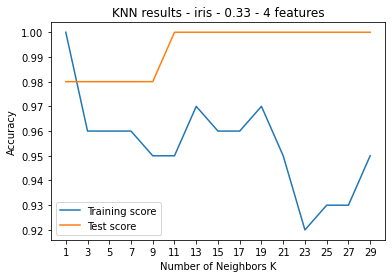

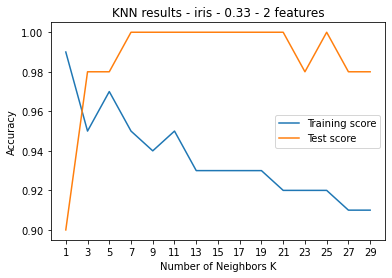

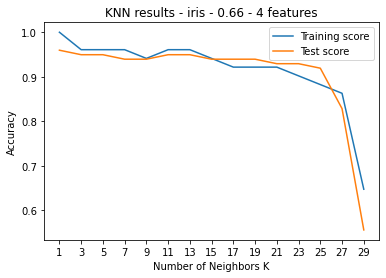

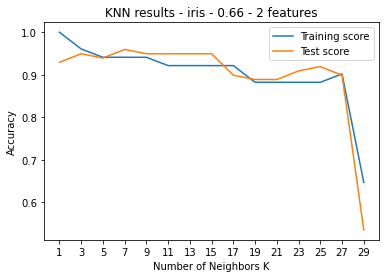

In [14]:
# Create a list of all parameter combinations will run the classifier on
params = [("iris",[0,1,2,3], .33),
          ("iris",[0,2], .33),
          ("iris",[0,1,2,3], .66),
          ("iris",[0,2], .66)]
""",
          ("breastcancer",np.arange(30), .33),
          ("breastcancer",np.arange(10), .33),
          ("breastcancer",np.arange(30), .66),
          ("breastcancer",np.arange(10), .66)]"""



# Iterate through each parameter combination
for p in params:
    
    # Load data, train classifer, evaluate score
    results.append( train_and_evaluate(*p, k_vals=k_vals, random_state=random_state))
    
    # Plot results
    plot_dataset_results(*p,*results[-1], k_vals=k_vals)



##### Breast Cancer

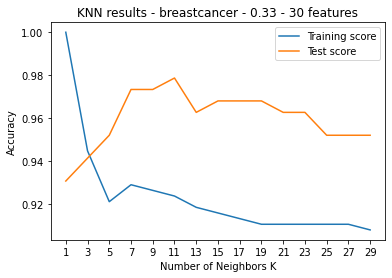

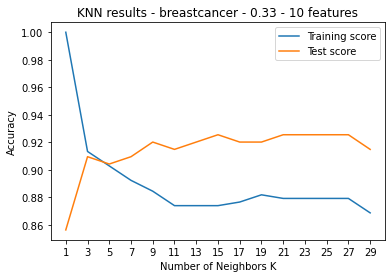

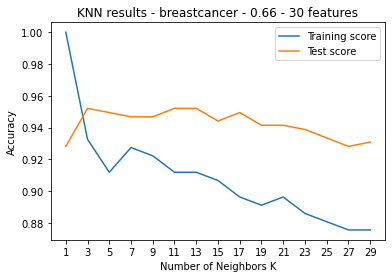

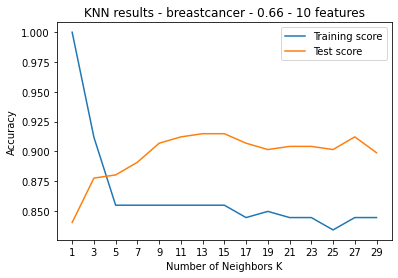

In [17]:
# Create a list of all parameter combinations will run the classifier on
params = [("breastcancer",np.arange(30), .33),
          ("breastcancer",np.arange(10), .33),
          ("breastcancer",np.arange(30), .66),
          ("breastcancer",np.arange(10), .66)]



# Iterate through each parameter combination
for p in params:
    
    # Load data, train classifer, evaluate score
    results.append( train_and_evaluate(*p, k_vals=k_vals, random_state=random_state))
    
    # Plot results
    plot_dataset_results(*p,*results[-1], k_vals=k_vals)